__Objective__: The OIMA identifies mis-reported units by looking for deviations from average gallons per capita day. The prod and delivery files contain a GPCD column, but the data dictionary does not specify if this value was calculated from the original units or the OIMA's revised units. Explore data to attempt to determine if GPCD is calculated in revised or original units.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
pd.set_option('display.width', 5000) 
pd.set_option('display.max_colwidth', -1) 
pd.set_option('display.max_columns', 60)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
processed_data_path  ="../data/interim/"

In [4]:
prod = pd.read_csv("{}2_explore_unit_correction___prod_before_unit_conversion.csv".format(processed_data_path))
deliv = pd.read_csv("{}2_explore_unit_correction___deliv_before_unit_conversion.csv".format(processed_data_path))

deliv['gpcd_numeric'] = deliv['CALCULATED GPCD (Total delivery to residential in gallons per capita day)'].apply(lambda x: pd.to_numeric(str(x).replace(",",""),errors='coerce'))
prod['gpcd_numeric'] = prod['CALCULATED GPCD (Total Potable Produced in gallons per capita day)'].apply(lambda x: pd.to_numeric(str(x).replace(",",""),errors='coerce'))

In [5]:
deliv_gallons_col = 'Total. RESIDENTIAL Delivered.Gallons (Total Does not include Landscape Irrigation, Agricultural or to other PWS)_numeric'
revised_num_col = 'WATER DELIVERIES Total.Delivered Residential IN REVISED UNITS (Total Does not include Landscape Irrigation, Agricultural or to other PWS)_numeric'
revised_units_col = 'Delivered.Water.Units.Revised BY OFFICE OF INFORMATION MANAGEMENT AND ANALYSIS'
original_units_col =  'Delivered.Water.Units AS ORIGINALLY REPORTED'

### Is the provided GPCD equal to  "Total. RESIDENTIAL Delivered.Gallons" / population / days in month?

In [6]:
deliv['total_deliv_in_gallons_div_resid_deliv_gallons'] = (deliv[deliv_gallons_col] / deliv['Population Of Service Area']) / deliv['Days.In.Month']
deliv['gpcd_minus_total_deliv_in_gallons_div_resid_deliv_gallons'] = deliv['gpcd_numeric'] - deliv['total_deliv_in_gallons_div_resid_deliv_gallons']
deliv['pct_diff_gpcd_vs_total_deliv_in_gallons_div_resid_deliv_gallons'] = deliv['gpcd_minus_total_deliv_in_gallons_div_resid_deliv_gallons'] / deliv['gpcd_numeric']

% with non-0 GPCD: 0.9423358687204576
% with < 1% error: 0.9675783837864879
% with < 0.05% error: 0.9509214066492706


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


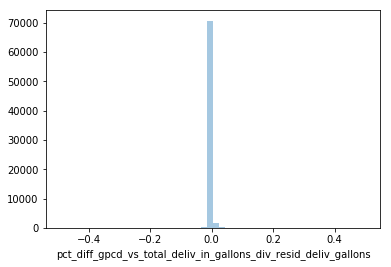

In [7]:
print("% with non-0 GPCD: {}".format(deliv[deliv['gpcd_numeric'] > 0].shape[0]  / deliv.shape[0]))
excl_0 = deliv[deliv['gpcd_numeric'] > 0]
print("% with < 1% error: {}".format(excl_0[(np.abs(excl_0['pct_diff_gpcd_vs_total_deliv_in_gallons_div_resid_deliv_gallons']) < 0.01) ].shape[0]  / excl_0.shape[0]))
print("% with < 0.05% error: {}".format(excl_0[(np.abs(excl_0['pct_diff_gpcd_vs_total_deliv_in_gallons_div_resid_deliv_gallons']) < 0.005) ].shape[0]  / excl_0.shape[0]))

sns.distplot(excl_0['pct_diff_gpcd_vs_total_deliv_in_gallons_div_resid_deliv_gallons'],kde=False)
plt.show()

### Is the provided GPCD equal to "Total.Delivered Residential IN REVISED UNITS " /population / days in month?

In [8]:
deliv['total_deliv_in_revised_div_resid_deliv_gallons'] = (deliv[revised_num_col] / deliv['Population Of Service Area']) / deliv['Days.In.Month']
deliv['gpcd_minus_total_deliv_in_revised_div_resid_deliv_gallons'] = deliv['gpcd_numeric'] - deliv['total_deliv_in_revised_div_resid_deliv_gallons']
deliv['pct_diff_gpcd_vs_total_deliv_in_revised_div_resid_deliv_gallons'] = deliv['gpcd_minus_total_deliv_in_revised_div_resid_deliv_gallons'] / deliv['gpcd_numeric']
excl_0 = deliv[deliv['gpcd_numeric'] > 0]

% with < 1% error: 0.3925070643429823
% with < 0.05% error: 0.3784189391993294


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


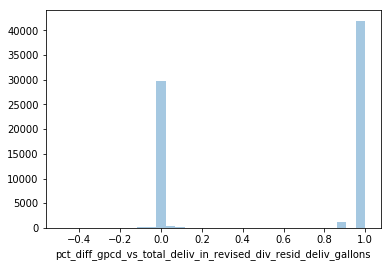

In [9]:
print("% with < 1% error: {}".format(excl_0[(np.abs(excl_0['pct_diff_gpcd_vs_total_deliv_in_revised_div_resid_deliv_gallons']) < 0.01) ].shape[0]  / excl_0.shape[0]))
print("% with < 0.05% error: {}".format(excl_0[(np.abs(excl_0['pct_diff_gpcd_vs_total_deliv_in_revised_div_resid_deliv_gallons']) < 0.005) ].shape[0]  / excl_0.shape[0]))

sns.distplot(excl_0['pct_diff_gpcd_vs_total_deliv_in_revised_div_resid_deliv_gallons'],kde=False)
plt.show()

In [10]:
# Among records with > 1% error, are the revised units not in gallons? 

In [11]:
# moderate error: more than 2%
excl_0[np.abs(excl_0['pct_diff_gpcd_vs_total_deliv_in_revised_div_resid_deliv_gallons']) > 0.01][revised_units_col].value_counts().reset_index()

index  Delivered.Water.Units.Revised BY OFFICE OF INFORMATION MANAGEMENT AND ANALYSIS
0  CCF   21592                                                                         
1  MG    11828                                                                         
2  AF    8406                                                                          
3  G     1852                                                                          
4  CF    1092                                                                          
5  HG    78                                                                            
6  DG    60                                                                            
7  TG    24

In [12]:
# extreme error: Greater than 50%
excl_0[np.abs(excl_0['pct_diff_gpcd_vs_total_deliv_in_revised_div_resid_deliv_gallons']) > 0.5][revised_units_col].value_counts().reset_index()

index  Delivered.Water.Units.Revised BY OFFICE OF INFORMATION MANAGEMENT AND ANALYSIS
0  CCF   21592                                                                         
1  MG    11828                                                                         
2  AF    8406                                                                          
3  CF    1092                                                                          
4  HG    78                                                                            
5  DG    60                                                                            
6  TG    24

### Is the "TOTAL POTABLE WATER IN GALLONS" equal to the "TOTAL POTABLE WATER PRODUCED USING REVISED UNITS" when converted from revised units to Gallons?

In [13]:
# key = original unit
# value = multiplication factor to obtain gallons
conversionDict = {"AF": 325851.43,
                  "CF": 7.48051948,
                "CCF": 748.051948,
                  "DG": 10,
                  "G":1,
                  "HG": 100.,
                  "MG": 1000000.,
                 "TG": .1}

In [14]:
print(deliv.shape)
deliv_oima_units = deliv[deliv[revised_units_col]!="-"]
print(deliv_oima_units.shape)

(78489, 41)
(77699, 41)


In [15]:
deliv_oima_units['total_deliv_in_revised_conv_to_gallons'] = deliv_oima_units[[revised_num_col,revised_units_col]].apply(lambda x: conversionDict[x[1]]*x[0],axis=1)  

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
deliv_oima_units['diff_deliv_revised_to_deliv_gallons'] = deliv_oima_units['total_deliv_in_revised_conv_to_gallons'] - deliv_oima_units[deliv_gallons_col]
deliv_oima_units['pct_diff_deliv_revised_to_deliv_gallons'] = deliv_oima_units['diff_deliv_revised_to_deliv_gallons'] / deliv_oima_units[deliv_gallons_col]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


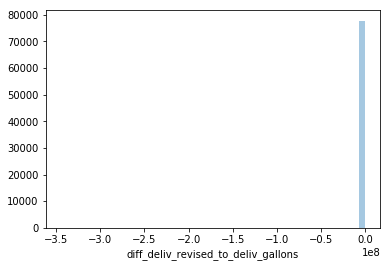

In [17]:
sns.distplot(deliv_oima_units['diff_deliv_revised_to_deliv_gallons'],kde=False)
plt.show()

In [18]:
print("% with < 0.01 unit of error: {}".format(deliv_oima_units[(np.abs(deliv_oima_units['diff_deliv_revised_to_deliv_gallons']) < 0.01) ].shape[0]  / deliv_oima_units.shape[0]))
print("% with < 1 units of error: {}".format(deliv_oima_units[(np.abs(deliv_oima_units['diff_deliv_revised_to_deliv_gallons']) < 1) ].shape[0]  / deliv_oima_units.shape[0]))
print("% with < 2 units of error: {}".format(deliv_oima_units[(np.abs(deliv_oima_units['diff_deliv_revised_to_deliv_gallons']) < 2) ].shape[0]  / deliv_oima_units.shape[0]))

% with < 0.01 unit of error: 0.8436530714681013
% with < 1 units of error: 0.9025727486840243
% with < 2 units of error: 0.9140272075573688


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


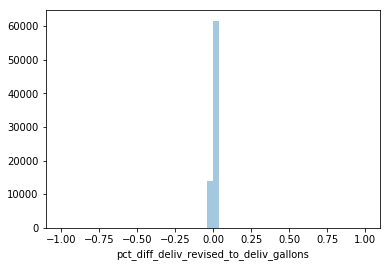

In [19]:
sns.distplot(deliv_oima_units[pd.isnull(deliv_oima_units['pct_diff_deliv_revised_to_deliv_gallons'])==False]['pct_diff_deliv_revised_to_deliv_gallons'],kde=False)
plt.show()

In [20]:
print("% with < 0.01% of error: {}".format(deliv_oima_units[(np.abs(deliv_oima_units['pct_diff_deliv_revised_to_deliv_gallons']) < 0.01)
                                                              & (pd.isnull(deliv_oima_units['pct_diff_deliv_revised_to_deliv_gallons'])==False) ].shape[0]  / deliv_oima_units[(pd.isnull(deliv_oima_units['pct_diff_deliv_revised_to_deliv_gallons'])==False)].shape[0]))
print("% with < 1% of error: {}".format(deliv_oima_units[(np.abs(deliv_oima_units['pct_diff_deliv_revised_to_deliv_gallons']) < 1)
                                                              & (pd.isnull(deliv_oima_units['pct_diff_deliv_revised_to_deliv_gallons'])==False)].shape[0]  / deliv_oima_units[(pd.isnull(deliv_oima_units['pct_diff_deliv_revised_to_deliv_gallons'])==False)].shape[0]))
print("% with < 2% of error: {}".format(deliv_oima_units[(np.abs(deliv_oima_units['pct_diff_deliv_revised_to_deliv_gallons']) < 2)
                                                              & (pd.isnull(deliv_oima_units['pct_diff_deliv_revised_to_deliv_gallons'])==False)].shape[0]  / deliv_oima_units[(pd.isnull(deliv_oima_units['pct_diff_deliv_revised_to_deliv_gallons'])==False)].shape[0]))

% with < 0.01% of error: 0.9955475458496766
% with < 1% of error: 0.9997614756705184
% with < 2% of error: 1.0


Finding: When the 'WATER DELIVERIES Total.Delivered Residential IN REVISED UNITS (Total Does not include Landscape Irrigation, Agricultural or to other PWS)_numeric' column is converted from revised units to gallons, the value is within 1% of the value in 'Total. RESIDENTIAL Delivered.Gallons (Total Does not include Landscape Irrigation, Agricultural or to other PWS)_numeric'

Thus, if we want to recover the ORIGINAL value on the report, we need to convert the value in 'WATER DELIVERIES Total.Delivered Residential IN REVISED UNITS (Total Does not include Landscape Irrigation, Agricultural or to other PWS)_numeric'  from the revised units to the original units.

### Convert 'WATER DELIVERIES Total.Delivered Residential IN REVISED UNITS (Total Does not include Landscape Irrigation, Agricultural or to other PWS)_numeric' from revised units to original units in order to recover values on original report

In [21]:
deliv_oima_units[ (deliv_oima_units[original_units_col]!="-")
                & (deliv_oima_units[revised_units_col]!=deliv_oima_units[original_units_col])].groupby([revised_units_col,original_units_col]).count().reset_index().sort_values('PWSID',ascending=False)

Delivered.Water.Units.Revised BY OFFICE OF INFORMATION MANAGEMENT AND ANALYSIS Delivered.Water.Units AS ORIGINALLY REPORTED  PWSID  Water.System.Name  Water.System.Classification  Year  Month  Date  Days.In.Month  UNITS ADJUSTED BY OIMA?  WATER DELIVERIES TO Single.family.Residential  WATER DELIVERIES TO  Multi.family.Residential  WATER DELIVERIES TO  Commercial.Institutional  WATER DELIVERIES TO  Industrial  WATER DELIVERIES TO  Landscape.Irrigation  WATER DELIVERIES TO  Other  WATER DELIVERIES TO  Agricultural  WATER DELIVERIES TO  Other.PWS  WATER DELIVERIES Total.Delivered Residential IN REVISED UNITS (Total Does not include Landscape Irrigation, Agricultural or to other PWS)  Total. RESIDENTIAL Delivered.Gallons (Total Does not include Landscape Irrigation, Agricultural or to other PWS)  Population Of Service Area  CALCULATED GPCD (Total delivery to residential in gallons per capita day)  WATER DELIVERIES TO  Multi.family.Residential_numeric  WATER DELIVERIES TO  Commercial.Institutional_numeric  WATER DELIVERIES TO  Industrial_numeric  WATER DELIVERIES TO  Landscape.Irrigation_numeric  WATER DELIVERIES TO  Other_numeric  WATER DELIVERIES TO  Agricultural_numeric  WATER DELIVERIES TO  Other.PWS_numeric  WATER DELIVERIES Total.Delivered Residential IN REVISED UNITS (Total Does not include Landscape Irrigation, Agricultural or to other PWS)_numeric  Total. RESIDENTIAL Delivered.Gallons (Total Does not include Landscape Irrigation, Agricultural or to other PWS)_numeric  original_units_incorrect  units_unavailable   key  gpcd_numeric  total_deliv_in_gallons_div_resid_deliv_gallons  gpcd_minus_total_deliv_in_gallons_div_resid_deliv_gallons  pct_diff_gpcd_vs_total_deliv_in_gallons_div_resid_deliv_gallons  total_deliv_in_revised_div_resid_deliv_gallons  gpcd_minus_total_deliv_in_revised_div_resid_deliv_gallons  pct_diff_gpcd_vs_total_deliv_in_revised_div_resid_deliv_gallons  total_deliv_in_revised_conv_to_gallons  diff_deliv_revised_to_deliv_gallons  pct_diff_deliv_revised_to_deliv_gallons
5   CF                                                                             CCF                                          1044   1044               1044                         1044  1044   1044  1044           1044                     1017                                           342                                            501                                            114                              325                                        232                         84                                 24                              1044                                                                                                                                       1044                                                                                                              1044                        1044                                                                       342                                                    501                                                    114                                      325                                                232                                 84                                         24                                      1044                                                                                                                                               1044                                                                                                                      1044                      1044               1044  1044          1044                                            1044                                                       1044                                                             1044                                            1044                                                       1044                                                             1044                                    1044                        

In [22]:
revisedToOriginalConversionDict = {
    'CF_CCF': 0.01,
    'G_MG': 1/float(1000000),
    'G_CCF':748.051948,
    'MG_G': 1000000.,
    'AF_CCF': 435.6,
    'CCF_AF': 1/435.6,
    'CCF_G': 1/748.051948,
    'CCF_MG': (1/748.051948)/float(1000000),
    'HG_G': 100.,
    'MG_CCF' : 748.051948*1000000.,
    'DG_G': 10.,
    'TG_G': 0.1,
    'AF_G': 325851.43,
    'CF_G': 7.48051948,
    'DG_CCF': 748.051948*10.,
    'G_AF': 1/325851.43,
    'G_G': 1,
    'CCF_CCF':1,
    'MG_MG':1,
    'AF_AF':1
}

In [23]:
print(deliv_oima_units.shape)
deliv_oima_units = deliv_oima_units[ (deliv_oima_units[original_units_col]!="-")]
print(deliv_oima_units.shape)

(77699, 44)
(74962, 44)


In [24]:
deliv_oima_units['revised_units_to_original_units']  = deliv_oima_units[[revised_units_col,original_units_col]].apply(lambda x: "{}_{}".format(x[0],x[1]),axis=1 )

In [25]:
deliv_oima_units['original_delivered_value'] = deliv_oima_units[['revised_units_to_original_units',revised_num_col]].apply(lambda x: revisedToOriginalConversionDict[x[0]]*x[1],axis=1)

### Convert value in original units to gallons; calculate GPCD

In [26]:
deliv_oima_units['original_delivered_value_in_gallons'] = deliv_oima_units[[original_units_col,'original_delivered_value']].apply(lambda x: conversionDict[x[0]]*x[1],axis=1)  

In [27]:
deliv_oima_units['gpcd_from_original_delivered_value_in_gallons'] = (deliv_oima_units['original_delivered_value_in_gallons']/ deliv_oima_units['Population Of Service Area']) / deliv_oima_units['Days.In.Month']

### Explore GPCD among GPCD reported in incorrect units

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


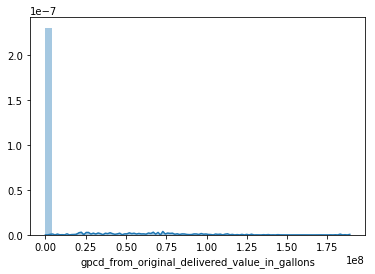

In [28]:
incorrectUnitsGPCD = deliv_oima_units[ (deliv_oima_units['original_units_incorrect']==1)
                     & (pd.isnull(deliv_oima_units['gpcd_from_original_delivered_value_in_gallons'])==False)
                    & (np.isinf(deliv_oima_units['gpcd_from_original_delivered_value_in_gallons'])==False)]['gpcd_from_original_delivered_value_in_gallons']
sns.distplot(incorrectUnitsGPCD)
plt.show()

In [29]:
incorrectUnitsGPCD.describe(percentiles=[0.1,.25,.5,.75,.9])

count   2,451.00      
mean    7,915,834.62  
std     23,313,854.91 
min     0.00          
10%     1.05          
25%     66.48         
50%     123.99        
75%     244.41        
90%     33,211,568.46 
max     188,844,776.03
Name: gpcd_from_original_delivered_value_in_gallons, dtype: float64

### Explore GPCD among GPCD reported in correct units

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


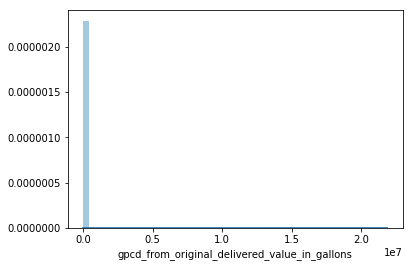

In [30]:
correctUnitsGPCD = deliv_oima_units[ (deliv_oima_units['original_units_incorrect']==0)
                     & (pd.isnull(deliv_oima_units['gpcd_from_original_delivered_value_in_gallons'])==False)
                    & (np.isinf(deliv_oima_units['gpcd_from_original_delivered_value_in_gallons'])==False)]['gpcd_from_original_delivered_value_in_gallons']
sns.distplot(correctUnitsGPCD)
plt.show()

In [31]:
correctUnitsGPCD.describe(percentiles=[0.1,.25,.5,.75,.9])

count   70,412.00    
mean    3,229.74     
std     232,095.48   
min     -291.56      
10%     10.52        
25%     48.64        
50%     96.49        
75%     170.15       
90%     336.69       
max     21,867,914.39
Name: gpcd_from_original_delivered_value_in_gallons, dtype: float64

In [32]:
### Review incorrect units that have comparable GPCD to correct units

In [33]:
comp = deliv_oima_units[ (deliv_oima_units['original_units_incorrect']==1)
                     & (pd.isnull(deliv_oima_units['gpcd_from_original_delivered_value_in_gallons'])==False)
                    & (np.isinf(deliv_oima_units['gpcd_from_original_delivered_value_in_gallons'])==False)
                & (deliv_oima_units['gpcd_from_original_delivered_value_in_gallons'] > 48)
                 & (deliv_oima_units['gpcd_from_original_delivered_value_in_gallons'] < 170)]

In [34]:
comp['diff_gpcd_from_original_g_vs_gpcd_numeric'] = comp['gpcd_from_original_delivered_value_in_gallons'] - comp['gpcd_numeric']
comp['pct_diff_gpcd_from_original_g_vs_gpcd_numeric'] = comp['diff_gpcd_from_original_g_vs_gpcd_numeric']  / comp['gpcd_numeric']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


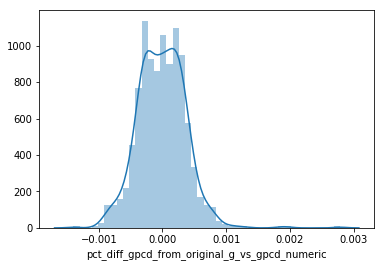

In [35]:
sns.distplot(comp['pct_diff_gpcd_from_original_g_vs_gpcd_numeric'])
plt.show()

In [36]:
comp.shape

(1083, 50)

In [37]:
comp['revised_units_to_original_units'].value_counts()

CF_CCF    664
G_MG      129
CCF_AF    77 
MG_G      73 
HG_G      58 
AF_CCF    56 
CF_G      8  
DG_G      7  
G_AF      7  
AF_G      4  
Name: revised_units_to_original_units, dtype: int64

In [38]:
comp[0:5][['Total. RESIDENTIAL Delivered.Gallons (Total Does not include Landscape Irrigation, Agricultural or to other PWS)_numeric',
           'WATER DELIVERIES Total.Delivered Residential IN REVISED UNITS (Total Does not include Landscape Irrigation, Agricultural or to other PWS)_numeric',
           'revised_units_to_original_units','original_delivered_value','original_delivered_value_in_gallons']]

Total. RESIDENTIAL Delivered.Gallons (Total Does not include Landscape Irrigation, Agricultural or to other PWS)_numeric  WATER DELIVERIES Total.Delivered Residential IN REVISED UNITS (Total Does not include Landscape Irrigation, Agricultural or to other PWS)_numeric revised_units_to_original_units  original_delivered_value  original_delivered_value_in_gallons
1217 3,350,629.40                                                                                                              447,914.00                                                                                                                                          CF_CCF                         4,479.14                  3,350,629.40                        
1218 4,241,611.64                                                                                                              567,021.00                                                                                                                                          CF_CCF                         5,670.21                  4,241,611.64                        
1222 3,866,194.29                                                                                                              516,835.00                                                                                                                                          CF_CCF                         5,168.35                  3,866,194.29                        
1229 2,939,559.90                                                                                                              392,962.00                                                                                                                                          CF_CCF                         3,929.62                  2,939,559.90                        
1230 3,897,148.68                                                                                                              520,973.00                                                                                                                                          CF_CCF                         5,209.73                  3,897,148.68

* For these records, the total residential delivery gallons column appears to be calculated from the original units, not the revised units.
* Try calculating GPCD from the "WATER DELIVERIES Total.Delivered Residential IN REVISED UNITS (Total Does not include Landscape Irrigation, Agricultural or to other PWS)_numeric" column, but assume the values are in the original units (do not convert from revised units to original units).

### Calculate GPCD from ""WATER DELIVERIES Total.Delivered Residential IN REVISED UNITS", but assume the value is in the original units

In [39]:
deliv_oima_units['water_deliv_residential_revised_units_in_orig_units_to_gallons'] = deliv_oima_units[[original_units_col,revised_num_col]].apply(lambda x: conversionDict[x[0]]*x[1],axis=1) 
deliv_oima_units['gpcd_from_water_deliv_residential_revised_units_in_orig_units_in_gallons'] = (deliv_oima_units['water_deliv_residential_revised_units_in_orig_units_to_gallons']/ deliv_oima_units['Population Of Service Area']) / deliv_oima_units['Days.In.Month']

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


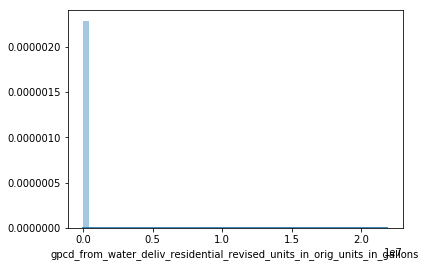

In [40]:
correctUnitsGPCD = deliv_oima_units[ (deliv_oima_units['original_units_incorrect']==0)
                     & (pd.isnull(deliv_oima_units['gpcd_from_water_deliv_residential_revised_units_in_orig_units_in_gallons'])==False)
                    & (np.isinf(deliv_oima_units['gpcd_from_water_deliv_residential_revised_units_in_orig_units_in_gallons'])==False)]['gpcd_from_water_deliv_residential_revised_units_in_orig_units_in_gallons']
sns.distplot(correctUnitsGPCD)
plt.show()

In [41]:
correctUnitsGPCD.describe(percentiles=[0.1,.25,.5,.75,.9])

count   70,412.00    
mean    3,229.74     
std     232,095.48   
min     -291.56      
10%     10.52        
25%     48.64        
50%     96.49        
75%     170.15       
90%     336.69       
max     21,867,914.39
Name: gpcd_from_water_deliv_residential_revised_units_in_orig_units_in_gallons, dtype: float64

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


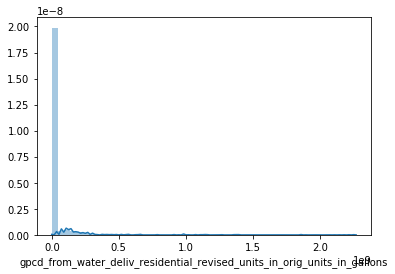

In [42]:
incorrectUnitsGPCD = deliv_oima_units[ (deliv_oima_units['original_units_incorrect']==1)
                     & (pd.isnull(deliv_oima_units['gpcd_from_water_deliv_residential_revised_units_in_orig_units_in_gallons'])==False)
                    & (np.isinf(deliv_oima_units['gpcd_from_water_deliv_residential_revised_units_in_orig_units_in_gallons'])==False)]['gpcd_from_water_deliv_residential_revised_units_in_orig_units_in_gallons']
sns.distplot(incorrectUnitsGPCD)
plt.show()

In [43]:
incorrectUnitsGPCD.describe(percentiles=[0.1,.25,.5,.75,.9])

count   2,451.00        
mean    25,848,618.24   
std     122,647,998.51  
min     0.00            
10%     0.11            
25%     3,723.11        
50%     13,814.03       
75%     57,109.54       
90%     36,912,508.34   
max     2,271,723,220.16
Name: gpcd_from_water_deliv_residential_revised_units_in_orig_units_in_gallons, dtype: float64

In [44]:
deliv_oima_units.to_csv("{}3_explore_gpcd___gpcdFromOriginalReport.csv".format(processed_data_path))